#  Assignment - 2 :- (Srikanth S)

*Loading The Data Set:*

In [24]:
import numpy as np
import pandas as pd


In [25]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [26]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


*Data Visualizations -> Univariate Analysis:*

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

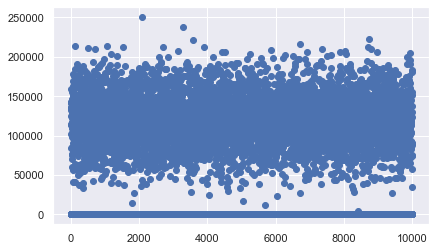

In [30]:
plt.scatter(df.index,df['Balance'])
plt.show()

<AxesSubplot:ylabel='Age'>

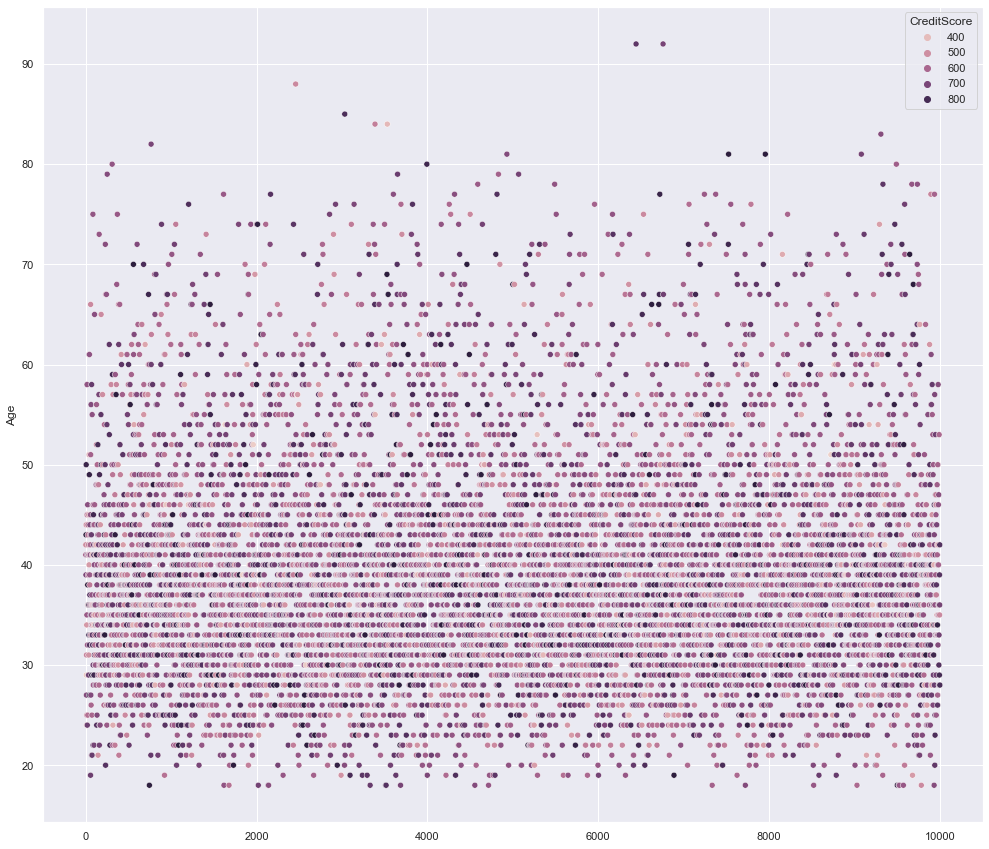

In [35]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=df.index,y=df['Age'],hue=df['CreditScore'])

*-> Bi - Variate Analysis :*

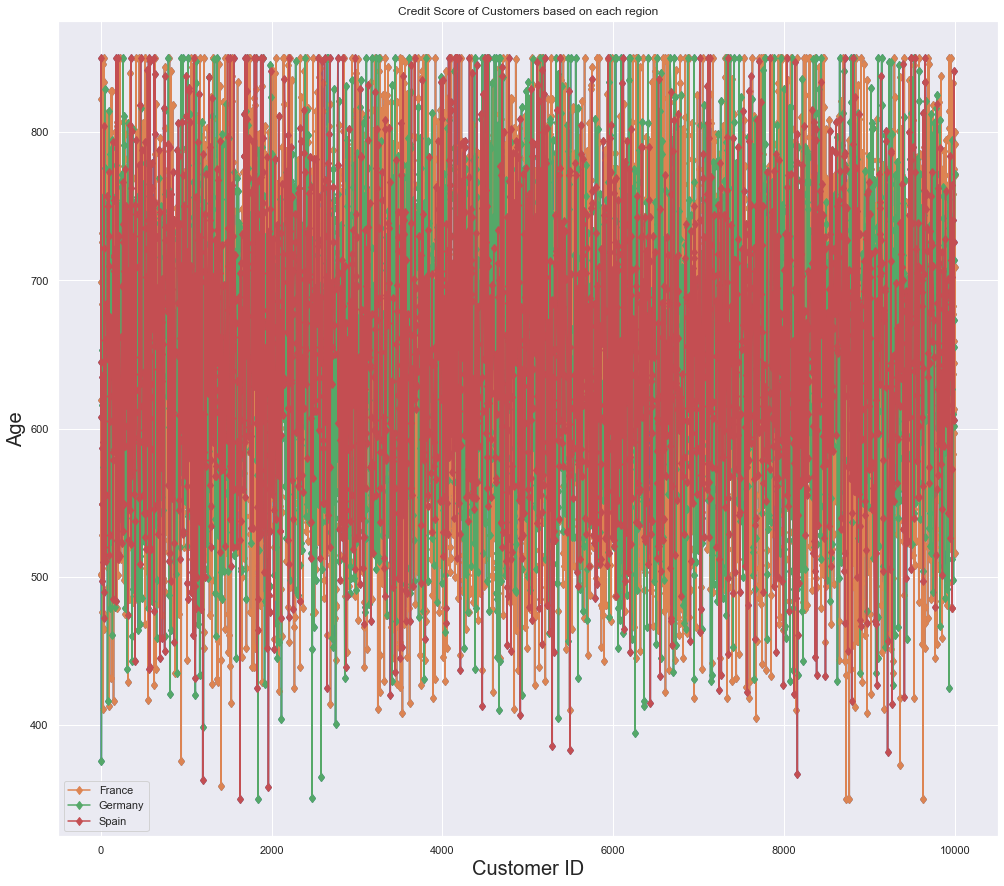

In [39]:
plt.figure(figsize=(15,15))
plt.title('Credit Score of Customers based on each region')
plt.xlabel('Customer ID', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.plot(df.index, df['CreditScore'],markevery=1,marker='d')
for name,group in df.groupby('Geography'):
  plt.plot(group.index,group['CreditScore'],label=name,markevery=1,marker='d')
plt.legend()
plt.show()

*-> Multi - Variate Analysis :*

<AxesSubplot:xlabel='Balance', ylabel='CreditScore'>

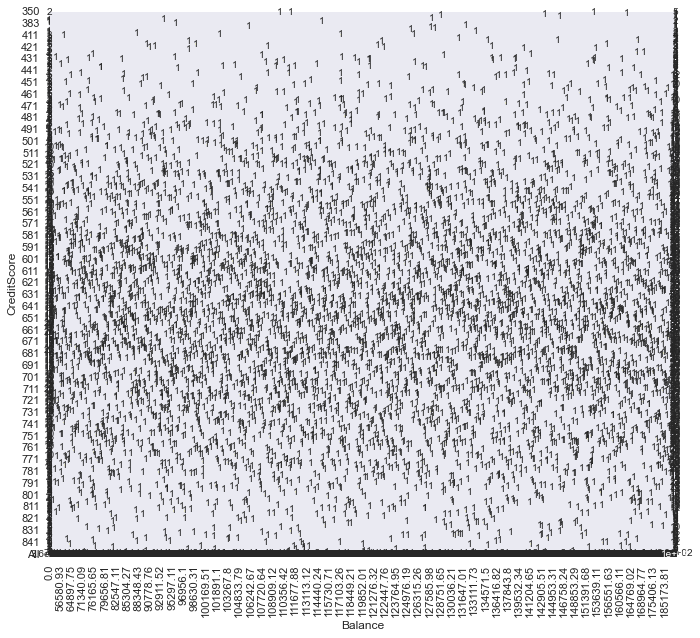

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(df['CreditScore'], df['Balance'], margins=True,     values=df['NumOfProducts'], aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=True, cbar=False)

*Descriptive Statistics:*

In [40]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


*Handling Missing Values:*

In [41]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
data = df['CreditScore'].tolist()
outlier = []
threshold = 3
mean = np.mean(data)
std = np.std(data)
for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score)>threshold:
        outlier.append(i)
print(outlier)

[359, 350, 350, 358, 351, 350, 350, 350]


*Finding Outliners : ( Checked Only For Balance Column )*

<AxesSubplot:ylabel='Age'>

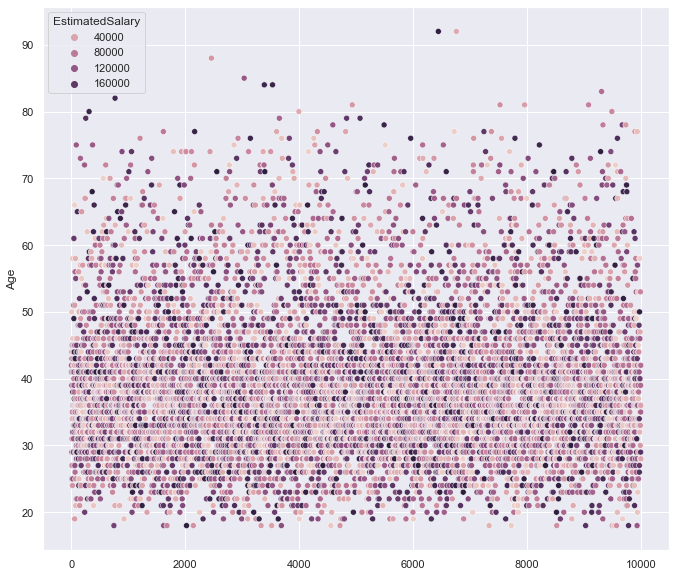

In [46]:
median = df.loc[df['CreditScore']>359, 'CustomerId'].median()
df.loc[df.CreditScore <360, 'CreditScore'] = median

# plot after removing outliers
plt.figure(figsize=(10,10))
sns.scatterplot(x=df.index,y=df['Age'],hue=df['EstimatedSalary'])

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Geography']=label_encoder.fit_transform(df['Geography'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Surname']=label_encoder.fit_transform(df['Surname'])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


*Encoding For Categorial Values: (Label Encoding)*

In [50]:
y = df['Exited']
X = df.drop(['Exited'],axis=1)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data = X[['CreditScore','Age','Balance',"EstimatedSalary"]]
scaled_data=std_scaler.fit_transform(data)
X[['CreditScore','Age','Balance',"EstimatedSalary"]]=scaled_data
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,-0.329963,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,2,15647311,1177,-0.444214,2,0,0.198164,1,0.117350,1,0,1,0.216534
2,3,15619304,2040,-1.545179,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,4,15701354,289,0.500954,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,5,15737888,1822,2.069309,2,0,0.388871,2,0.785728,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,1.248779,0,1,0.007457,5,-1.225848,2,1,0,-0.066419
9996,9997,15569892,1336,-1.399769,0,1,-0.373958,10,-0.306379,1,1,1,0.027988
9997,9998,15584532,1570,0.604818,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643
9998,9999,15682355,2345,1.259165,1,1,0.293517,3,-0.022608,2,1,0,-0.125231


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

*Dependent And Independent Varibles :*

In [53]:
x = df.iloc[:,0:12]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0


In [54]:
y = df["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

*Training And Testing :*

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state=10)

In [57]:
xtrain

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
5663,5664,15765287,1047,850,0,0,38,2,0.00,2,1,0
2840,2841,15714057,2833,528,2,1,40,4,0.00,2,1,0
4550,4551,15803415,2359,579,0,0,39,3,166501.17,2,1,0
17,18,15788218,1154,549,2,0,24,9,0.00,2,1,1
3442,3443,15784130,1146,850,1,0,30,8,154870.28,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9372,9373,15775826,1260,677,0,1,30,1,78133.15,1,0,1
7291,7292,15611318,1456,599,2,1,33,4,51690.89,1,1,0
1344,1345,15691104,1388,460,1,0,40,6,119507.58,2,1,0
7293,7294,15716276,1388,709,0,0,34,2,111669.68,1,1,0


*Scaling :*

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
nm = MinMaxScaler()

In [60]:
n_xtrain = nm.fit_transform(xtrain)
n_xtrain

array([[0.56631326, 0.7983751 , 0.35699659, ..., 0.33333333, 1.        ,
        0.        ],
       [0.28395679, 0.59344198, 0.9665529 , ..., 0.33333333, 1.        ,
        0.        ],
       [0.454991  , 0.95089686, 0.80477816, ..., 0.33333333, 1.        ,
        0.        ],
       ...,
       [0.13432687, 0.5016241 , 0.47337884, ..., 0.33333333, 1.        ,
        0.        ],
       [0.72934587, 0.60231855, 0.47337884, ..., 0.        , 1.        ,
        0.        ],
       [0.12882577, 0.49272753, 0.02457338, ..., 0.        , 1.        ,
        0.        ]])

In [61]:
n_xtest = nm.fit_transform(xtest)
n_xtest

array([[0.09371874, 0.38570863, 0.42164561, ..., 0.        , 0.        ,
        1.        ],
       [0.93568714, 0.22474162, 0.38716285, ..., 0.        , 1.        ,
        0.        ],
       [0.22934587, 0.94253122, 0.87913964, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.75415083, 0.67871418, 0.87094572, ..., 0.        , 1.        ,
        0.        ],
       [0.52760552, 0.05567626, 0.3526801 , ..., 0.33333333, 0.        ,
        1.        ],
       [0.96559312, 0.82983031, 0.15022192, ..., 0.33333333, 0.        ,
        0.        ]])